In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

In [5]:
df = pd.read_csv('../Dataset/vehicles.csv')

In [6]:
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [7]:
print(df.shape)

(426880, 26)


In [8]:
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [9]:
df.drop(columns=['VIN', 'url', 'region_url', 'description', 'image_url', 'county'], inplace=True)

In [10]:
df.drop(columns=['lat', 'long', 'posting_date'], inplace=True)

In [11]:
df['odometer'].fillna(df['odometer'].mean(), inplace=True)

/var/folders/tk/gmpblnfs1g5cv54_rr2z3hp80000gn/T/ipykernel_48014/4225897990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['odometer'].fillna(df['odometer'].mean(), inplace=True)


In [12]:
df.replace("", np.nan, inplace=True)

In [13]:
# 📐 Feature Engineering: Car Age
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['car_age'] = 2025 - df['year']
df.drop(columns=['year'], inplace=True)
df['car_age'].fillna(df['car_age'].median(), inplace=True)

/var/folders/tk/gmpblnfs1g5cv54_rr2z3hp80000gn/T/ipykernel_48014/3364438983.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['car_age'].fillna(df['car_age'].median(), inplace=True)


In [14]:
df.to_csv('../Dataset/vehicle_cleaned.csv', index=False)

In [15]:
numeric_cols = df.select_dtypes(include=np.number)

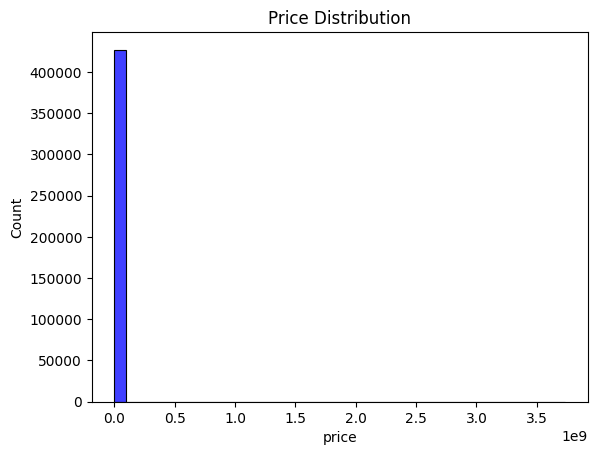

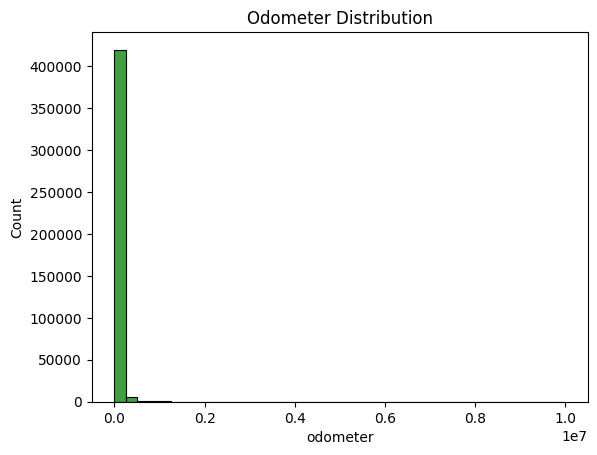

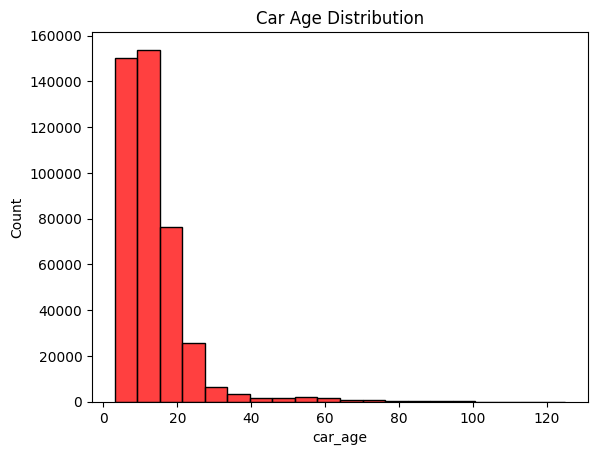

In [16]:
# Histograms
sns.histplot(df['price'], bins=40, color='blue'); plt.title("Price Distribution"); plt.show()
sns.histplot(df['odometer'], bins=40, color='green'); plt.title("Odometer Distribution"); plt.show()
sns.histplot(df['car_age'], bins=20, color='red'); plt.title("Car Age Distribution"); plt.show()

In [17]:
# Outlier Detection
def count_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    return ((x < (q1 - 1.5 * iqr)) | (x > (q3 + 1.5 * iqr))).sum()

print(numeric_cols.apply(count_outliers))

id             44
price        8177
odometer     4481
car_age     15896
dtype: int64


In [18]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] >= (q1 - 1.5 * iqr)) & (df[col] <= (q3 + 1.5 * iqr))]

df = remove_outliers(df, 'price')
df = remove_outliers(df, 'odometer')

In [19]:
print(df.shape)

(414363, 17)


In [20]:
df.to_csv('../Dataset/vehicle_EDA.csv', index=False)

In [21]:
# 🔢 Feature Encoding & Model Prep
df = pd.read_csv('../Dataset/vehicle_EDA.csv')

In [22]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
drop_cols = ['region', 'manufacturer', 'model']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [23]:
# Encode remaining categorical features
df = pd.get_dummies(df, drop_first=True)

In [24]:
# 🎯 Feature-Target Split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 1️⃣ Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [26]:
# 2️⃣ Random Forest
rf = RandomForestRegressor(n_estimators=20, max_features=10, random_state=123)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [30]:

def evaluate(y_test, preds, model_name):
    print(f"\n📊 {model_name} Performance:")
    print("✅ RMSE:", round(sqrt(mean_squared_error(y_test, preds)), 2))
    print("✅ MAE :", round(mean_absolute_error(y_test, preds), 2))
    print("✅ R²  :", round(r2_score(y_test, preds), 4))

In [31]:
evaluate(y_test, lr_preds, "Linear Regression")


📊 Linear Regression Performance:
✅ RMSE: 10058.5
✅ MAE : 7297.28
✅ R²  : 0.4145


In [32]:
evaluate(y_test, rf_preds, "Random Forest")


📊 Random Forest Performance:
✅ RMSE: 6252.41
✅ MAE : 3626.66
✅ R²  : 0.7738


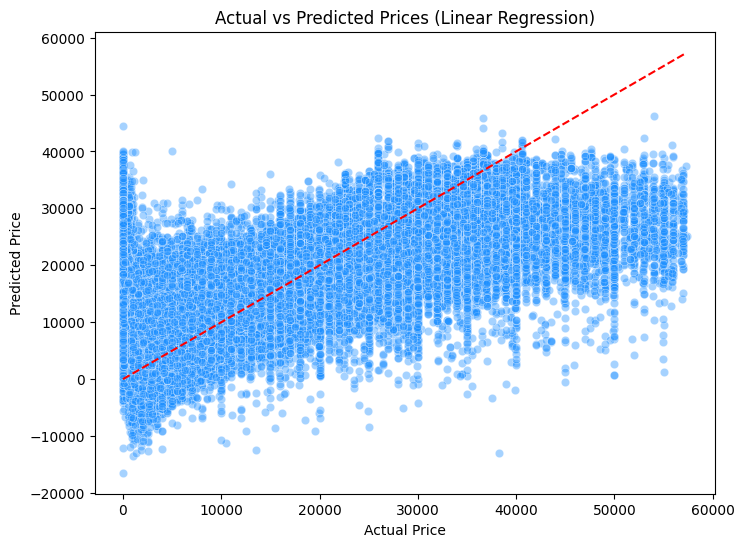

In [33]:
# Example for Linear Regression
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": lr_preds
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=comparison_df, x="Actual", y="Predicted", alpha=0.4, color="dodgerblue")
plt.plot([comparison_df.Actual.min(), comparison_df.Actual.max()],
         [comparison_df.Actual.min(), comparison_df.Actual.max()],
         'r--')
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

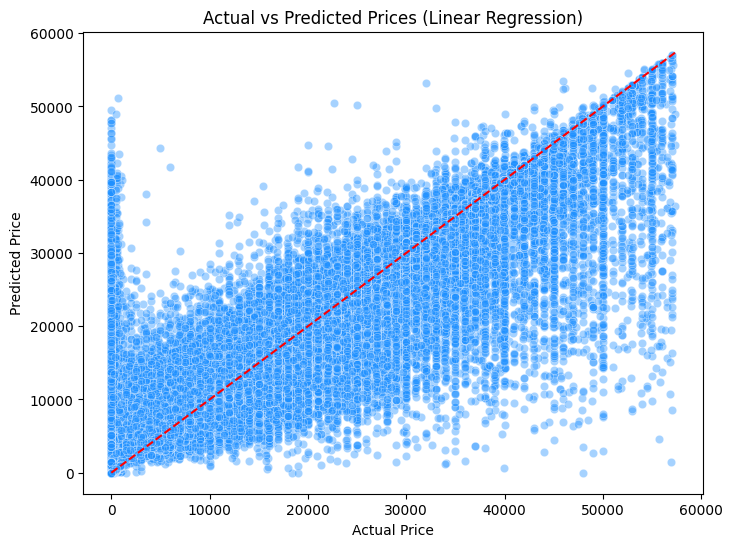

In [34]:
# Example for Linear Regression
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": rf_preds
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=comparison_df, x="Actual", y="Predicted", alpha=0.4, color="dodgerblue")
plt.plot([comparison_df.Actual.min(), comparison_df.Actual.max()],
         [comparison_df.Actual.min(), comparison_df.Actual.max()],
         'r--')
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()